# 1. Pendahuluan

KNN termasuk salah satu algoritma tertua dalam ilmu machine learning, yang pertama kali diusulkan pada tahun [1951](https://apps.dtic.mil/dtic/tr/fulltext/u2/a800276.pdf) oleh  Evelyn Fix dan Joseph Hodges. KNN merupakan model non-parametrik yang dapat digunakan sebagai model **klasifikasi** dan juga model **regresi**. Prinsip yang digunakan untuk kedua kasus tersebut sama, yaitu dengan mengambil sejumlah `k` data di set data training yang **mirip** atau **dekat** dengan data baru. `k` data tersebut digunakan untuk menghitung luaran dari model. Perbedaan antara kedua kasus tersebut adalah pada **luaran**nya:

* Luaran pada kasus klasifikasi adalah **kelas/label** dari data yang baru. Untuk kasus ini, kita bisa menggunakan **majority label** `k`-data yang paling dekat dengan data baru tersebut.
* Luaran pada kasus regresi adalah **bilangan real** yang bisa dihitung dengan melakukan **rata-rata** dari `k`-data yang paling dekat dengan data baru.

---

## 1.1. KNN Sebagai model non-parametrik 

Berdasarkan parameternya, model dapat digolongkan dalam 2, yaitu parametrik dan non-parametrik. Dalam model **parametrik**, jumlah parameternya tetap. Sebagai contoh dalam *linear regression* terdapat parameter $w$ yang jumlahnya tetap berapapun jumlah sampel yang kita punya. Sedangkan dalam model **non-parametrik**, parameternya bertambah seiring dengan jumlah sampel yang kita punya. Berikut adalah perbedaan dari kedua tipe tersebut:

Model Parametrik:
- Komputasi ringan dan cepat digunakan karena sebanyak apapun data yang kita punya, parameter yang digunakan jumlahnya tetap.
- Hal ini mengindikasikan bahwa model parametrik memberikan asumsi pada distribusi datanya dengan parameter yang berjumlah tetap tersebut. 
- Karena parameternya berjumlah tetap, dengan data yang tidak terdapat batasan pada jumlah dan variasinya, model parametrik tidak terlalu fleksibel karena memiliki asumsi yang cukup kuat terhadap data.


Model Non-parametrik:
- Lebih fleksibel karena jumlah parameter bertambah seiring jumlah sampel yang kita punya.
- Hal ini mengindikasikan bahwa model tidak memiliki asumsi pada distribusi data kasus yang kita modelkan. Dengan kata lain, struktur modelnya ditentukan oleh data yang kita punya. 
- Namun, hal ini menyebabkan pelambatan yang cukup signifikan pada sampel yang besar.

Berikut adalah beberapa contoh penggolongan model ( [Machine Learning a Probabilistic Perspective](https://probml.github.io/pml-book/book0.html) ):

<img src="https://i.stack.imgur.com/Y34LY.png" width= 700px;/>

KNN merupakan model non-parametrik, yang struktur modelnya ditentukan oleh data training yang kita gunakan. Saat melakukan pengujian pada data baru, semua data latih akan dievaluasi (dihitung jaraknya terhadap data uji). Sehingga data latih disini adalah parameter yang bertambah jumlahnya seiring banyaknya sampel.

---

## 1.2. *Pseudo code* dan Ekspresi Matematis

Secara umum, *pseudo code* KNN untuk klasifikasi bisa ditulis sebagai berikut ([Prasath et al, 2019](https://arxiv.org/pdf/1708.04321.pdf)):

```
Input: Training samples D, Test sample d, K
Output: Class label of test sample
1: Compute the distance between d and every sample in D
2: Choose the K samples in D that are nearest to d; denote the set by S_x
3: Assign d the class it that is the most frequent class (or the majority class) of S_x
```

Set $S_x$ beranggotakan `k` titik yang paling dekat dengan data kita. Setelah kita mendapatkan $S_x$, luaran untuk **klasifikasi** bisa ditentukan dengan:

$$
h(\mathbf{x})=\operatorname{mode}\left(\left\{y^{\prime \prime}:\left(\mathbf{x}^{\prime \prime}, y^{\prime \prime}\right) \in S_{\mathbf{x}}\right\}\right)
$$

sesuai dengan langkah ke-3 di atas. Sedangkan untuk kasus **regresi**, kita ganti dengan menghitung rata-rata dari $S_x$ sebagai berikut:

$$
h(\mathbf{x})=\operatorname{mean}\left(\left\{y^{\prime \prime}:\left(\mathbf{x}^{\prime \prime}, y^{\prime \prime}\right) \in S_{\mathbf{x}}\right\}\right)
$$

---

## 1.3. Mengukur Kedekatan atau Kemiripan

Algoritma KNN berangkat dari suatu asumsi yaitu:

> **Point data yang mirip memiliki label yang sama**

Kita dapat mengukur **kemiripan** ini dengan jarak yang dapat dihitung menggunakan metrik jarak (**distance metric**). Metrik jarak merupakan komponen paling esensial dalam KNN. Jika jarak yang digunakan tidak sesuai dengan kasus atau data yang kita miliki maka performa KNN tidak akan baik pula.  

Secara matematis, metrik jarak harus memenuhi kondisi berikut:

1. Non-negativity: $\operatorname{dist}(\mathbf{x},\mathbf{z})\geq0$
2. Identity: $\operatorname{dist}(\mathbf{x},\mathbf{z})=0$, jika dan hanya jika $\mathbf{x}=\mathbf{z}$
3. Symmetry: $\operatorname{dist}(\mathbf{x},\mathbf{z}) = \operatorname{dist}(\mathbf{z},\mathbf{x})$
4. Triangle inequality: $\operatorname{dist}(\mathbf{x},\mathbf{y})+\operatorname{dist}(\mathbf{y},\mathbf{z}) \geq \operatorname{dist}(\mathbf{x},\mathbf{z})$

### Minkowski Distance

Salah satu metrik yang sering digunakan adalah **Minkowski Distance**:

$$
\operatorname{dist}(\mathbf{x}, \mathbf{z})=\left(\sum_{r=1}^{d}\left|x_{r}-z_{r}\right|^{p}\right)^{1 / p}
$$

Minkowski Distance ini merupakan generalisasi dari beberapa metrik jarak, antara lain:  
**Manhattan distance** saat $p = 1$,  
**Euclidean distance** ketika $p = 2$, dan  
**max difference** saat $p = \infty$.


### Manhattan distance

$$
\operatorname{dist}(\mathbf{x}, \mathbf{x'})=\sum_{i=1}^{n}\left|\mathbf{x}_{i}-\mathbf{x}'_{i}\right|
$$

*Manhattan distance* mengukur jarak dengan menghitung ruas garis di **tiap koordinat** antar dua titik. Bayangkan cara gerak Benteng pada permainan catur. *Manhattan distance* mengukur jarak terpendek dari dua titik menggunakan cara gerak Benteng. *Manhattan distance* lebih **tidak** sensitif terhadap *outliers* dibanding *Euclidean distance*. Beberapa kasus lebih cocok menggunakan *Manhattan distance*, contohnya jarak ditentukan berapa banyak petak tanah pada jarak perumahan.

### Euclidean distance
$$
\operatorname{dist}(\mathbf{x}, \mathbf{x'})=\sqrt{\sum_{i=1}^{n}\left(\mathbf{x}_{i}-\mathbf{x}'_{i}\right)^{2}}
$$

*Euclidean distance* adalah metrik jarak untuk mengukur jarak ruas garis antar dua titik. Metrik ini selaras dengan bagimana manusia mempresepsikan jarak di alam (teorema *Pythagoras*). Metrik ini lebih sensitif terhadap *outliers* dibandingkan dengan *Manhattan distance* karena memiliki $p$ yang lebih besar. *Euclidean distance* dapat bekerja dengan sangat baik jika data kita terdistribusi normal dan memiliki sedikit *outliers*.

### Max Difference atau Chebyshev distance
$$
\operatorname{dist}(\mathbf{x},\mathbf{x}')=\max _{i}\left|\mathbf{x}_{i}-\mathbf{x}'_{i}\right|
$$
Saat $p=\infty$, *Minkowski distance* sama dengan *max difference* atau disebut juga *Chebyshev distance*. Metrik ini mengukur selisih maksimum diantara tiap koordinat antar dua titik. Kasus yang cocok untuk *Chebyshev distance* misalkan untuk mengukur waktu yang diperlukan *overhead crane* di gudang logistik untuk memindahkan barang (*crane* dapat bergerak pada koordinat x dan y secara bersamaan).

Metrik jarak lain beserta performanya dapat dilihat di referensi berikut ini: ([Prasath et al, 2019](https://arxiv.org/pdf/1708.04321.pdf))

# Pertanyaan:
Mengapa *Minkowski distance* dapat dikatakan sebagai generalisasi dari *Manhattan distance*, *Eucledian distance*, dan *max difference* ?

# Jawab:

Berbeda dengan metrik jarak lainnya, Minkowski Distance menggunakan parameter tambahan (P) dalam formulanya. Parameter P tersebut digunakan untuk menentukan seberapa besar kelengkungan dari garis jarak yang ingin dicari.
Dengan adanya P tersebut, Minkowski Distance dapat mengeneralisir metrik jarak lainya (Euclidean Distance, Manhattan Distance, dan Max Difference), dengan nilai P tertentu, yaitu:

**Manhattan distance** saat $p = 1$.  
Manhataan Distance dapat di generalisir Minkowski Distance saat P = 1 dikarenakan pada P = 1 formula Minkowski Distance akan sama dengan Manhattan Distance, sehingga membentuk garis siku antar dua titik yang sama dengan Manhattan Distance.

**Euclidean distance** ketika $p = 2$.  
**max difference** saat $p = \infty$.
Dengan alasan yang sama dengan Manhattan Distance, Minkowski Distance juga mengeneralisir Euclidean Distance saat P = 2 dan Max Difference saat p = $\infty$

---
## 1.4. Pengaruh nilai K

Secara umum algoritma KNN untuk klasifikasi dapat divisualisasikan sebagai berikut:

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg" width= 500px;/>


Nilai K pada KNN cukup sensitif terhadap hasil klasifikasi.

# Pertanyaan:
1. Dari gambar di atas, apa prediksi label titik hijau jika K=3?
2. Apa yang terjadi saat K=5?

# Jawab:
1. Segitiga Merah.
2. Hasil prediksi titik hijau berubah dari segitiga merah menjadi kotak biru, karena jumlah kotak biru lebih banyak dibandingkan segitiga merah dengan K = 5.

---

# 2. Contoh Code

Sebagai contoh untuk memberikan gambaran lebih jauh, kita gunakan dataset `ushape` yang memiliki input 2 dimensi, yaitu **x1** dan **x2**, serta outpu 1 dimensi, yaitu **y** yang bernilai 1 atau 0 (*binary classification problem*).

In [ ]:
# Load libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#sns.set(style='whitegrid', context='notebook')
plt.rcParams['figure.figsize'] = (10, 7)

In [ ]:
# Load data
ushapedata = pd.read_csv('https://raw.githubusercontent.com/Adityarajora/Complete-KNN-visualization/master/1.ushape.csv',
                         names=['x1', 'x2', 'y'])

# Tampilkan 5 data pertama
ushapedata.head(5)

,x1,x2,y
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


Asumsikan data baru kita adalah $(-0.2,0.7)$. Sehingga, plot data training dan data baru kita adalah sebagai berikut:

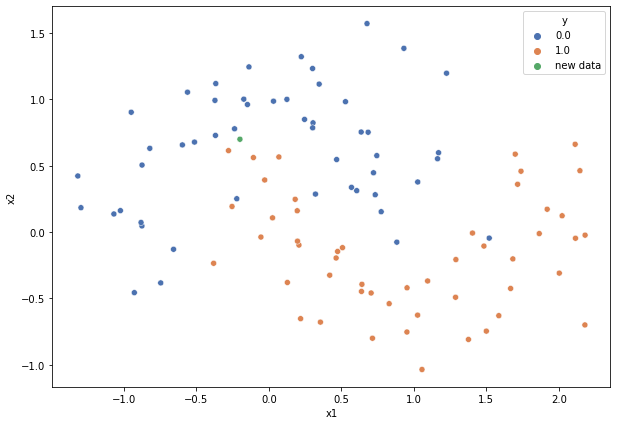

In [ ]:
x_new = [[-0.2, 0.7]]

data_with_new_point = ushapedata.append({"x1":x_new[0][0],"x2":x_new[0][1],"y":"new data"}, ignore_index=True)
display(sns.scatterplot(data=data_with_new_point, x="x1", y="x2",hue='y',palette='deep'))

Terdapat dua label pada ouput, yaitu 0 dan 1. Data baru kita direpresentasikan dengan titik warna hijau. Yang menjadi pertanyaan: label apakah yang akan kita berikan pada data baru tersebut? Apakah 0 atau 1?

---
## 2.1. KNN menggunakan scikit-learn

Kita lakukan klasifikasi KNN menggunakan library scikit-learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Ubah tipe data menjadi numpy array
X = ushapedata[["x1","x2"]].to_numpy()
Y = ushapedata["y"].to_numpy()

# model
neigh = KNeighborsClassifier()

# training
neigh.fit(X, Y)

KNeighborsClassifier()

Setelah itu, kita bisa melakukan prediksi untuk data baru `x_new` dengan memanggil method `predict`:

In [ ]:
print("Prediksi kelas: ", neigh.predict(x_new))

Prediksi kelas:  [0.]


# Pertanyaan / Tugas:
Gunakan referensi: [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), jawablah pertanyaan berikut berdasarkan code di atas :
1. Berapakah nilai K yang digunakan ?
2. Distance metric apa yang digunakan ? 
3. Buat code di bawah ini, gunakan 2 metrik jarak lainnya, tulis nama metrik dan tampilkan hasil prediksi untuk data yang sama !
4. Buat code di bawah ini, bandingkan hasil dari 3 metrik jarak, untuk k = 3 !

# Jawab:
1. Nilai K yang digunakan adalah 5, dimana 5 adalah K default pada kNN dengan scikit-learn dan dapat dilihat menggunakan neigh.n_neighbors
2. Distance Metric yang digunakan Minkowski Distance, dikarenakan Minkowski DIstance adalah Distance Metric default kNN dengan scikit_learn. Dapat dilihat juga dengan neigh.metric
3. 

In [ ]:
# model dengan metrik Euclidean Distance
# Tulis code di bawah ini

# model (menggunakan metric euclidean distance)
euclidean_kNN = KNeighborsClassifier(metric = 'euclidean')

# training
euclidean_kNN.fit(X, Y)

# prediciton
print("Prediksi kelas: ", euclidean_kNN.predict(x_new))

Prediksi kelas:  [0.]


In [ ]:
# model dengan metrik Manhattan Distance
# Tulis code di bawah ini

# model (menggunakan metric manhattan distance)
manhattan_kNN = KNeighborsClassifier(metric = 'manhattan')

# training
manhattan_kNN.fit(X, Y)

# prediciton
print("Prediksi kelas: ", manhattan_kNN.predict(x_new))

Prediksi kelas:  [0.]


4. 

In [ ]:
''' all metrics defined by p.
 p = 1: Manhattan distance
 p = 2: Euclidean distance
 p = 3: Minkowski distance 
'''

# Tulis code di bawah ini

# Model untuk masing-masing metrik
manhattan_kNN = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan')
euclidean_kNN = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
minkowski_kNN = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski')

# Training setiap model
manhattan_kNN.fit(X, Y)
euclidean_kNN.fit(X, Y)
minkowski_kNN.fit(X, Y)

# Buat prediksi dari setiap model
print('Prediksi kelas untuk p=1:  ', manhattan_kNN.predict(x_new))
print('Prediksi kelas untuk p=2:  ', euclidean_kNN.predict(x_new))
print('Prediksi kelas untuk p=3:  ', minkowski_kNN.predict(x_new))

Prediksi kelas untuk p=1:   [0.]
Prediksi kelas untuk p=2:   [1.]
Prediksi kelas untuk p=3:   [1.]




---



## 2.2. Nilai K dalam KNN
Hyper-parameter K dalam KNN sangat berpengaruh kepada kualitas hasil klasifikasi oleh KNN, di bawah ini kita mengeksplor lebih jauh bagaimana pengaruh K dan bagaimana cara memilih K yang baik. Sebelum itu, kita plot decision boundary dari KNN dengan data yang kita load sebelumnya:

In [ ]:
from sklearn import datasets, neighbors
from ipywidgets import interact
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')

@interact
def knn_comparison(k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]):
  """
  this function is adapted from https://towardsdatascience.com/knn-visualization-in-just-13-lines-of-code-32820d72c6b6
  """
  x = ushapedata[['x1','x2']].values
  y = ushapedata['y'].astype(int).values
  clf = neighbors.KNeighborsClassifier(n_neighbors=k)
  clf.fit(x, y)
  plot_decision_regions(x, y, clf=clf, legend=2)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('KNN with k='+ str(k))
  plt.show()


interactive(children=(Dropdown(description='k', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=1), Output()), …

Silahkan bereksperimen dengan nilai k_list di baris code diatas dengan comment #change me, lalu jawablah pertanyaan di bawah ini.

# Pertanyaan
1. Apa yang terjadi jika K semakin besar?
2. Apa yang terjadi jika K semakin kecil?
3. Bagaimana menurut anda pengaruh nilai K dalam KNN? Apa hubungan nilai K dengan bias-variance tradeoff?

# Jawab:
1.  Saat nilai k semakin besar, hasil prediksi akan semakin semakin menyimpang ke rata-rata dari keseluruhan data yang menyebabkan underfitting.
2.  Apabila nilai k semakin mengecil, hasil prediksi bisa overfitting (terlalu bergantung dengan nilai terdekat).
3.  Pemilihan jumlah tetangga (k) dalam kNN sangatlah penting agar didapat hasil prediksi yang diinginkan. k yang baik seharusnya tidak terlalu besar ataupun terlalu kecil. Terhadap bias-variance tradeoff, k memiliki hubungan dimana dengan jumlah yang terlalu sedikit akan mengakibatkan overfitting (bias rendah, variance tinggi), sementara k yang terlalu besar menyebabkan underfitting (bias tinggi variance rendah).

Note: salah satu cara untuk mendapatkan nilai K yang optimal adalah dengan menggunakan **cross-validation**.

---

## 2.3. Catatan Tambahan: Mempercepat Perhitungan Jarak

Dalam aplikasinya sangat tidak disarankan untuk memakai cara naif dengan menghitung jarak semua data training dengan data testing kita satu persatu. Di dalam library scikit learn ([KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) ada 3 varian algoritma yang digunakan untuk mempercepat KNN, yaitu :

1. Brute Force
  - Brute force menghitung jarak dari data uji terhadap semua data latih kita di tahap pengujian. Hal ini menyebabkan waktu yang dilakukan untuk memprediksi data akan lama jika kita memiliki data uji yang banyak, dengan kompleksitas: $O[DN^2]$.

2. KD Tree
  - Untuk mempercepat prediksi, KD Tree membangun sebuah struktur data pohon dari data latih yang kita punya dan penghitungan jarak akan dibantu dengan pohon tersebut. 
  - Besar kompleksitas dari algoritma ini adalah $O[DN \log(N)]$.
  - Ide dasarnya adalah jika titik A sangat jauh dari titik B, dan titik B sangat dekat dengan titik C maka kita tahu bahwa titik A dan C juga jauh. Maka kita tidak perlu menghitung jarak titik A ke titik C secara langsung.
  - Secara visual:
    1. Bangun KD Tree dengan cara mempartisi space kita, misalkan kita bagi space saat $x=7$ kemudian di sisi kanan bagi saat $y=6$, di sisi kiri bagi saat $y=4$. lakukan secara rekursif sampai KD Tree terbentuk:
  <img src="https://qph.fs.quoracdn.net/main-qimg-5cba5d9422dfbcd48c154db5c756661d" width= 500px;/>
    2. Misalkan kita punya data test berada di titik warna ungu. Kita akan berjalan pertama melalui root $(7,2)$:
      <img src="https://qph.fs.quoracdn.net/main-qimg-df281b60a8b0b5580ee85af115bf6388" width= 500px;/>
    3. Karena titik ungu berada di sebelah kiri root, kita bisa meng eliminasi semua titik yang berada di area kanan root:
    <img src="https://qph.fs.quoracdn.net/main-qimg-33ebfe3105ce0d69aa0d20c3bbe6effd" width= 500px;/>
    4. Lakukan hal yang sama di leaf dari root pertama sampai kita berada di leaf terakhir:
        <img src="https://qph.fs.quoracdn.net/main-qimg-cdab708fd4059dc20a1e05bedd1c34a2" width= 500px;/>
    5. Setelah sampai di leaf terakhir kita dapat menghitung jarak pada titik yang areanya tidak ter eliminasi.  
    sumber gambar: https://www.quora.com/How-does-a-k-d-tree-find-the-K-nearest-neighbors

  
3. Ball Tree
  - Untuk mengatasi kelemahan KD Tree pada data yang memiliki dimensi tinggi, Ball Tree diperkenalkan dengan cara mengubah partisi koordinat kartesian dengan nesting hyper-spheres.
  - Ball tree secara rekursif membagi data kedalam nodes yang didefinisikan oleh centroid $C$ dan radius $r$. Secara visual Ball Tree dapat dibentuk sebagai berikut:

    <img src="https://www.researchgate.net/profile/Conor-Ransome/publication/342819363/figure/fig2/AS:911440366010368@1594315725423/Diagram-of-the-Ball-Tree-Algorithm-Step-i-the-data-points-ii-first-ball-the-parent_W640.jpg" width= 500px;/>
    
  - Dengan menggunakan *triangle inequality*, kita dapat melakukan penghitungan dengan hanya memanfaatkan *centroid* dari Ball-Tree kita. 
  - Dan karena struktur data kita seperti ini kita tidak menemui kelemahan terhadap dimensi tinggi seperti pada KD-Tree. 

Berikut ini kita bandingkan kecepatan dari ketiga algoritma tersebut. Untuk algoritma yang berbasiskan Tree kita perlu untuk membuild tree nya terlebih dahulu sehingga ada waktu build yang diperlukan. Build ini hanya dilakukan sekali. 

In [ ]:
import time
from sklearn.datasets import make_classification
X, Y = make_classification(500000,5)
from sklearn.neighbors import KDTree, BallTree

k = 5
method_list = {"ball_tree":BallTree, "kd_tree":KDTree}

for method in ["brute", "ball_tree", "kd_tree"]:
  rep = []

  if method != "brute":
    start_time_build = time.process_time()
    tree = method_list[method](X[5:], leaf_size=30) 
    print("run time build of",method,": ", time.process_time() - start_time_build)

  for i in range(10):
    start_time = time.process_time()
    if method == "brute":
      neigh = KNeighborsClassifier(n_neighbors=k,algorithm=method)
      neigh.fit(X[5:], Y[5:])
      neigh.predict(X[:1])
    else:
      dist, ind = tree.query(X[:1], k=k) 

    run_time = time.process_time() - start_time
    rep.append(run_time)
  rep = np.array(rep)
  print(method)
  print("run time :", np.mean(rep),u"\u00B1",np.std(rep))
  print("-------------------------------------------")

brute
run time : 0.1636730665000016 ± 0.026747616295986515
-------------------------------------------
run time build of ball_tree :  0.9700591629999735
ball_tree
run time : 0.0008424570999977732 ± 0.0006070858044529217
-------------------------------------------
run time build of kd_tree :  1.114145490999988
kd_tree
run time : 0.0001416698999946675 ± 7.100710124024402e-05
-------------------------------------------


# 3. Code from the scratch

## 3.1. KNN untuk Klasifikasi

Pada sub bab ini diharapkan Anda dapat menulis program KNN sebagai model klasifikasi menggunakan Numpy, yaitu dengan:
1. Menulis kode metric distance
2. Menulis kode core KNN algorithm
3. Menulis kode output KNN untuk klasifikasi
4. Melakukan cross validation untuk mendapatkan nilai K terbaik

Dataset yang digunakan adalah data `ushape` yang sama dengan sebelumnya:


In [ ]:
ushapedata = pd.read_csv('https://raw.githubusercontent.com/Adityarajora/Complete-KNN-visualization/master/1.ushape.csv',names=['x1', 'x2', 'y'])
X = ushapedata[["x1","x2"]].to_numpy()
Y = ushapedata["y"].to_numpy()
ushapedata.describe()

,x1,x2,y
count,100.000000,100.000000,100.000000
mean,0.500420,0.228701,0.500000
std,0.891044,0.592885,0.502519
min,-1.318500,-1.035702,0.000000
25%,-0.140330,-0.203260,0.000000
50%,0.470678,0.188660,0.500000
75%,1.112008,0.658448,1.000000
max,2.181372,1.571899,1.000000


## Distance metric 
Pertama kali yang harus dilakukan adalah membuat fungsi metrik jarak. Tulislah kode untuk menghitung jarak menggunakan *Minkowski distance* dengan $p=2$, atau sama dengan Euclidean distance dengan rumus yang telah diberikan sebelumnya, atau:

$$
\operatorname{dist}(\mathbf{x}, \mathbf{x'})=\sqrt{\sum_{i=1}^{n}\left(x_{i}-x'_{i}\right)^{2}}
$$



In [ ]:
# Jawab:
def dist(x,xprime):
  """
  x       : 1xd array titik data
  xprime  : 1xd array titik data

  returns : jarak Eucledian dari data x ke data xprime
  """
  np.testing.assert_equal(x.shape,xprime.shape)
  ### Tulis code di bawah ini:
  
  distance = np.sqrt(np.sum((x - xprime)**2))
    
  ### Akhir code

  return distance

> **Important reminder**: Ketika melakukan implementasi selalu perhatikan:
1. Ukuran dan dimensi matriks input dan output pada fungsi.
2. Karakteristik fungsi dari numpy/library yang digunakan.
3. Dalam praktik pengembangan software ML, menuliskan docstring seperti diatas dengan informasi dimensi akan sangat membantu.

## Core KNN algorithm
Berikutnya adalah membuat code untuk mendapatkan nilai jarak dari semua data latih ke data baru yang ingin kita klasifikasikan, kemudian lakukan sorting pada array jarak tersebut dari nilai distance yang terkecil ke yang terbesar.

Tulis kode penghitungan nilai distance tiap data training dibawah ini, sertakan juga index dari set distance tersebut

  hint: 
  1. gunakan fungsi dist yang telah anda tulis sebelumnya
  2. gunakan fungsi np.sort untuk melakukan sorting 
  3. untuk mendapatkan indeks yang telah terurut bisa menggunakan np.argsort

In [ ]:
# Jawab:
def knn(X_train, x_new, k):
  """
  X_train : N x d array data training
  x_new   : 1 x d array data baru
  k       : hyperparameter k, jumlah data yang menjadi tetangga 

  returns : K array indeks dan K array nilai distance yang telah di urutkan dari terkecil ke terbesar 
  """
  
  ### Tulis code di bawah ini:
  distance_list = [dist(x[None,:],x_new) for x in X_train]
  distances = np.sort(distance_list)[:k]
  indices = np.argsort(distance_list)[:k]
  ### Akhir code

  return indices, distances

## Classification output
Berikutnya adalah membuat kode untuk mendapatkan label dari data baru kita, untuk menentukan label dari data baru, kita dapat menggunakan majority voting 
label dari $S_x$. Secara matematis, peluang data baru $x_0$ memiliki label $j$ dapat dihitung dengan:

$$
\operatorname{Pr}\left(Y=j \mid X=x_{0}\right)=\frac{1}{|S_x|} \sum_{i \in \mathcal{N}_{S_x}} I\left(y_{i}=j\right)
$$

$\mathcal{N}_{S_x}$ adalah set index dari $S_x$, dan $I$ adalah indicator function yang bernilai 1 apabila $y_i=j$ dan 0 jika $y_i \neq j$. 

Sehingga dalam implementasinya, label dari data baru $x_0$ adalah $j$ ketika ${Pr}\left(Y=j \mid X=x_{0}\right)$ memberikan nilai tertinggi dibanding selain $j$.

In [ ]:
def label_prob(y_train_k, j, k):
  """
  y_train_k : K x 1 array K data training paling dekat dengan data baru
  j         : label yang ingin dihitung probabilitasnya
  k         : hyperparameter k, jumlah data yang menjadi tetangga

  returns   : probabilitas label j
  """
  
  j_k = np.tile(j,k)
  indicator = [1 if eq else 0 for eq in np.equal(y_train_k, j_k)]
  prob = np.sum(indicator)/k

  return prob

## Prediction
Sekarang kita gabungkan semua kode yang tadi untuk melakukan prediksi terhadap data baru

In [ ]:
def knn_predict(X_train, y_train, x_new_list, k =10):
  """
  X_train     : N x d array data training
  y_train     : N x 1 array label training
  x_new_list  : M x d array data baru
  k           : hyperparameter k, jumlah data yang menjadi tetangga

  returns     : M x 1 label data baru 
  """
  labels_of_k = []
  for x_new in x_new_list:
    indices, distances = knn(X_train, x_new[None,:], k)
    labels = np.unique(y_train)
    y_train_k = y_train[indices]
    probs = [label_prob(y_train_k, j, k) for j in labels]
    labels_of_k.append(labels[np.argmax(probs)])

  return np.array(labels_of_k)

Kita coba melakukan prediksi pada titik $(-1,1)$, $(2,-1)$ dan $(0.7,0)$


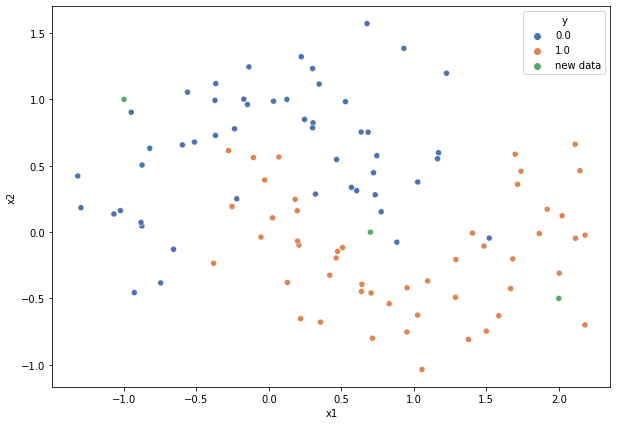

In [ ]:
data_with_new_point = ushapedata.append([{"x1":-1.,"x2":1   ,"y":"new data"},
                                         {"x1":2. ,"x2":-0.5,"y":"new data"},
                                         {"x1":0.7,"x2":0.  ,"y":"new data"}], ignore_index=True)

display(sns.scatterplot(data=data_with_new_point, x="x1", y="x2",hue='y',palette='deep'))

Kita dapat melakukan prediksi pada data tersebut dengan memanggil fungsi `knn_predict` yang telah kita tulis:

In [ ]:
new_data_list = np.array([[-1.,1.], [2.,-0.5], [0.7,0.]])
knn_predict(X,Y,new_data_list)

array([0., 1., 0.])

# Tugas
Lakukan percobaan yang sama dengan di atas, namun menggunakan library scikit-learn, lalu bandingkan hasilnya.

In [ ]:
# Melakukan percobaan klasifikasi diatas menggunakan library scikit-learn

'''
  model_kNN     : Model kNN yang dibuat menggunakan library scikit-learn
  new_data_list : Data baru yang akan diprediksi
'''

new_data_list = np.array([[-1.,1.], [2.,-0.5], [0.7,0.]])

# Digunakan kNN dengan k = 10 dan metric 'euclidean' (minkowski p = 2) agar sama dengan percobaan kNN from scratch 
model_kNN = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean') 

# latih data
model_kNN.fit(X, Y)

# Lakukan prediksi dengan new_data_list
model_kNN.predict(new_data_list)
# Hasil didapat sama dengan saat mengunakan kNN from scrath

array([0., 1., 0.])

## 3.2. Cross validation
Berikutnya kita evaluasi model kita menggunakan *cross validation*. Sebagai catatan disini kita menggunakan nilai $k=10$ sebagai hyperparameter dan menggunakan scikit-learn untuk membantu melakukan K-fold cross validation.

In [ ]:
from sklearn.model_selection import KFold

K = 10
n_fold = 10

def cross_val_error(X, Y, k=K, k_kfold=n_fold):
  kf = KFold(n_splits=k_kfold)
  kf.get_n_splits(X)

  total_error = 0
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    y_pred = knn_predict(X_train, y_train, X_test,k)
    error = np.sum(y_pred != y_test) / float(y_test.size)
    total_error = total_error + error

  return total_error/k_kfold

print("average error: ", cross_val_error(X,Y))

average error:  0.08


Apakah $k=10$ merupakan hyperparameter terbaik? Untuk mendapatkan $k$ terbaik atau dapat dikatakan pula menyeimbangkan bias-variance tradeoff, kita dapat melakukan pencarian dengan menguji performa KNN dengan cross validation dengan langkah sebagai berikut:

1. Bagi data latih kedalam kfold set dengan ukuran yang sama secara acak
2. Gunakan sebagian set sebagai data latih dan sisanya sebagai data validasi, sedemikian sehingga semua set digunakan sebagai data validasi setidaknya sekali.
3. Pada tiap data validasi hitung errornya
4. Dapatkan error rata-rata dari semua data validasi
5. Pilih $k$ dengan rata-rata error paling kecil

Kita telah menulis fungsi menghitung rata-rata error tiap set validasi dari KFold ccross validation menggunakan scikit-learn di cell atas, 
sehingga sekarang kita tinggal menjalankan fungsi tersebut dengan nilai $k$ yang berbeda. Kita visualisasikan error yang didapat ketika nilai $k$ bervariasi dari 1 sampai dengan 25. 

best at k =  3


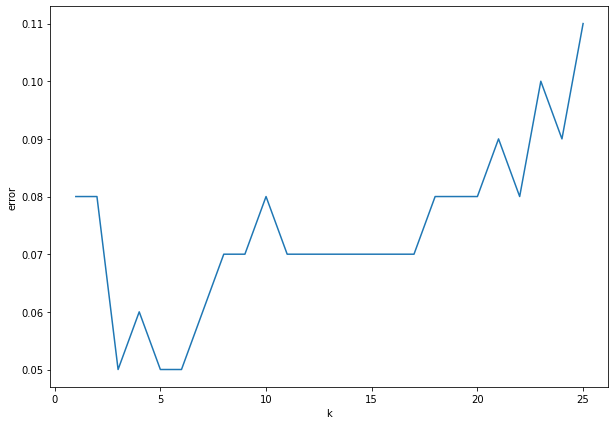

In [ ]:
error_k = [cross_val_error(X,Y,k) for k in np.arange(1,26)]
plt.plot(np.arange(1,26),error_k)
plt.xlabel("k")
plt.ylabel("error")
print("best at k = ",np.argmin(error_k)+1)

Dapat kita lihat bahwa rata-rata error terkecil bisa kita dapatkan ketika $k$ bernilai 3.

## 3.3. KNN sebagai model regresi

Pada Sub bab ini kita akan menggunakan KNN untuk kasus regresi. Tujuan dari penggunaan KNN kali ini untuk regresi nilai **Sales** dari 3 buah input yaitu pengeluaran iklan di **TV**, **Radio** dan **Newspaper**.

In [ ]:
# Load data
salesdata = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv')
X = salesdata[["TV","Radio","Newspaper"]].to_numpy()
Y = salesdata["Sales"].to_numpy()

# Tampilkan 5 data pertama
salesdata.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Summary statistik dari data kita adalah sebagai berikut:

In [ ]:
salesdata.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Kita bagi datanya menjadi data latih dan data uji dengan rasio 7:3

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=87)

Secara algoritma, regresi menggunakan KNN hampir sama dengan kasus klasifikasi. Oleh karena itu kita dapat menggunakan fungsi `distance` dan `knn` dari sub bab `3.1`. Yang membedakan adalah output dari prediksinya. Dalam kasus regresi, kita dapat mengambil nilai rerata dari $k$ titik tetangga terdekat dengan data baru yang ingin kita prediksi nilai outputnya. Secara matematis dapat dituliskan sebagai berikut:

$$
\hat{f}\left(x_{0}\right)=\frac{1}{K} \sum_{i \in \mathcal{N}_{S_x}} y_{i}
$$

Maka fungsi untuk mengambil rata rata dari $k$-data untuk memprediksi output data baru dapat dituliskan sebagai berikut:

In [ ]:
def knn_predict(X_train, y_train, x_new_list, k=10):
  """
  X_train: N x d array data training
  y_train: N x 1 array label training
  x_new_list  : N x d array data baru
  """
  
  y_pred_list = []

  for x_new in x_new_list:
    indices, distances = knn(X_train, x_new[None,:], k)
    y_train_k = y_train[indices]
    y_pred_list.append(np.sum(y_train_k)/k)
  
  return np.array(y_pred_list)

Untuk mengevaluasi model kita kita dapat menghitung Root Mean Square Error(RMSE) dari prediksi model kita dengan nilai output data testing sebenarnya.

In [ ]:
# Jawab:

k = 10

# hasil prediksi:
y_pred = knn_predict(X_train, y_train, X_test, k)

# Hitung RMSE dari y_pred
np.sqrt(np.mean((y_pred - y_test)**2))


1.8596966598525326

Untuk memvisualisasikannya kita dapat menggunakan pair plot sederhana antara nilai sebenarnya dengan prediksi dari KNN kita:

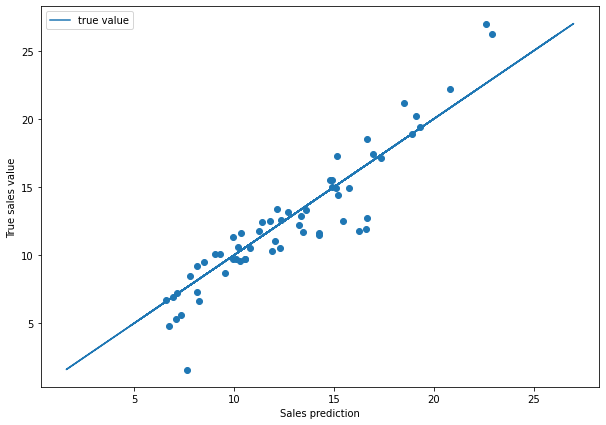

In [ ]:
plt.plot(y_test,y_test, label="true value")
plt.scatter(y_pred, y_test)
plt.xlabel("Sales prediction")
plt.ylabel("True sales value")
plt.legend()

Jika implemetasi Anda benar maka hasil dari scatter plot dekat dengan garis true value.

## 3.4. Cross validation untuk mendapatkan nilai k optimum
Kita juga dapat melakukan cross validation seperti di Sub bab 3.2 untuk mendapatkan nilai $k$ terbaik. Perbedaannya adalah penggunaan RMSE untuk menghitung error.

In [ ]:
from sklearn.model_selection import KFold

K = 10
n_fold = 10

def cross_val_evaluation(X, Y, k=K, k_kfold=n_fold):
  kf = KFold(n_splits=k_kfold)
  kf.get_n_splits(X)

  total_error = 0
  rmsetotal = 0
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    y_pred = knn_predict(X_train, y_train, X_test,k)
    rmsetotal = rmsetotal+np.sqrt(np.mean((y_pred-y_test)**2)) 

  return rmsetotal/k_kfold

print(f"RMSE on {n_fold}-Fold : ", cross_val_evaluation(X_train,y_train))

RMSE on 10-Fold :  1.919062224407569


Sekarang kita plot nilai RMSE pada cross validation yang kita lakukan dari $k=1$ sampai dengan $k=21$.

best at k =  2


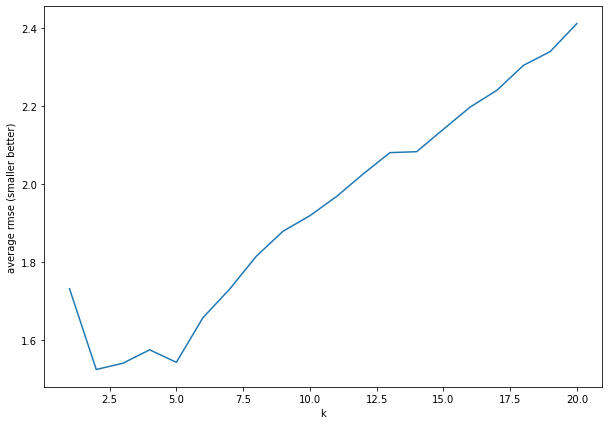

In [ ]:
error_k = [cross_val_evaluation(X_train,y_train,k) for k in np.arange(1,21)]
plt.plot(np.arange(1,21),error_k)
plt.xlabel("k")
plt.ylabel("average rmse (smaller better)")
best_k = np.argmin(error_k)+1
print("best at k = ", best_k)

Dari plot diatas kita bisa melihat tidak ada perbedaan signifikan dibanding dengan kasus klasifikasi. Bias-variance tradeoff juga terjadi di kasus regressi. 

Sekarang setelah mendapatkan nilai k terbaik mari kita cek RMSE dan pair plot dari hasil prediksi kita pada data testing!

RMSE: 1.5148707315587473


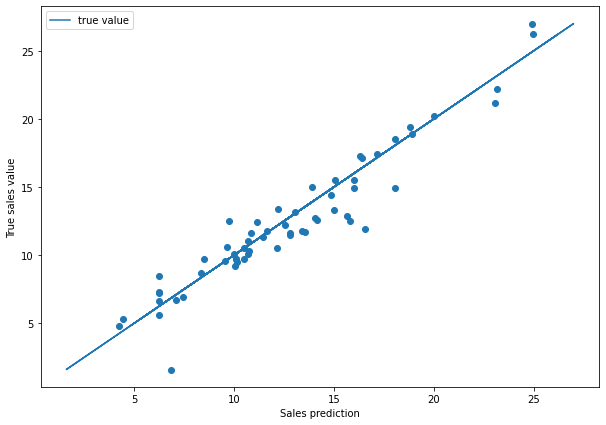

In [ ]:
y_pred = knn_predict(X_train, y_train, X_test, best_k)
plt.plot(y_test,y_test, label="true value")
plt.scatter(y_pred, y_test)
plt.xlabel("Sales prediction")
plt.ylabel("True sales value")
plt.legend()
print("RMSE:",np.sqrt(np.mean((y_pred-y_test)**2)))

Bandingkan dengan ketika $k=10$. RMSE semakin baik (Lebih kecil)! 

## Nilai k dan generalisasi model

Ingat kembali pengaruh nilai K terhadap hasil KNN di Sub bab `2.2`. Dari eksperimen dengan mengubah nilai K kita dapat melihat bahwa 
* ketika $k=1$ model kita menjadi sangat fleksibel, sehingga terjadi overfitting terhadap data kita. 
* ketika $k$ semakin besar KNN menjadi semakin tidak fleksible terhadap data kita dan decision boundary kita terlihat semakin linear, mengindikasikan underfitting pada KNN kita. 

Mari kita plot performa data kita dengan mengavaluasi nilai $k = 1$ sampai dengan $k=10$ lalu hitung nilai RMSE pada data latih dan data uji. Kita gunakan $1/k$ di sumbu $x$ untuk mengindikasikan fleksibilitas dari model kita. Semakin besar maka model semakin fleksibel.

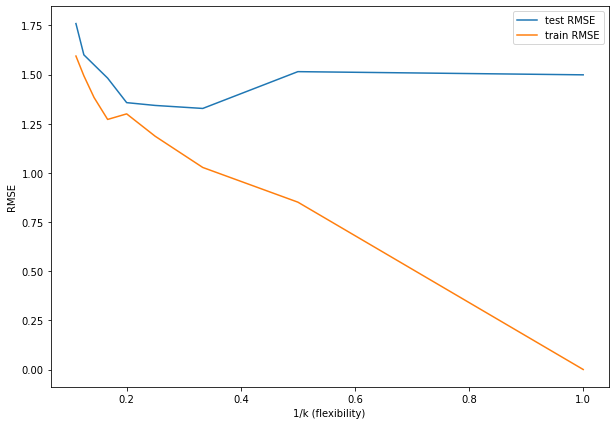

In [ ]:
rmse_test = []
rmse_train = []
for k in np.arange(1,11):
  y_pred_test = knn_predict(X_train, y_train, X_test,k)
  y_pred_train = knn_predict(X_train, y_train, X_train,k)

  rmse_test.append( np.sqrt(np.mean((y_pred_test-y_test)**2)))
  rmse_train.append( np.sqrt(np.mean((y_pred_train-y_train)**2)))
  
plt.plot(1/np.arange(1,11)[:-1],rmse_test[:-1],label="test RMSE")
plt.plot(1/np.arange(1,11)[:-1],rmse_train[:-1],label="train RMSE")
plt.xlabel("1/k (flexibility)")
plt.ylabel("RMSE")
plt.legend()

Saat $1/k = 1$ kita dapat melihat bahwa RMSE untuk data training = 0 namun test RMSE nya tidak lebih rendah saat $1/k=0.2$. Hal ini memperlihatkan bahwa terjadi overfit terhadap data.

Saat $1/k$ mendekati 0, RMSE dari data training dan data testing sama-sama naik. Dalam keadaan ini model kita mengalami underfitting.

# Laporan Akhir

- Cari dataset lain untuk kasus klasifikasi dan regresi. Lakukan pre-processing data jika diperlukan.
- Tuliskan sumber dataset yang anda pakai.
- Jelaskan secara singkat mengenai isi dari dataset tersebut.
- Cari nilai $k$ terbaik dengan cross validation, untuk kedua kasus tersebut.
- Gunakan nilai $k$ terbaik tersebut lalu itung performance dari hasil prediksi. Gunakan metrik yang sesuai.
- Tulis kesimpulan

Note : Mohon untuk memberikan keterangan dari setiap kolom kode yang dijalankan pada file .ipynb
